In [1]:
import csv

import json, os, sys
import pandas as pd

person_filename="../data/ORCID_migrations_2018_by_person.csv"
df_person=pd.read_csv(person_filename,delimiter="\t")
print(df_person.head())


whole_filename="../data/ORCID_migrations_2018.csv"
df=pd.read_csv(whole_filename,delimiter="\t")
print(df.head())

               orcid_id  phd_year country_2018  earliest_year  \
0  /0000-0002-9418-3797       NaN          NaN            NaN   
1  /0000-0001-6920-0797       NaN           BR         2013.0   
2  /0000-0003-1280-4797       NaN           ID         2001.0   
3  /0000-0002-7543-3797       NaN           CN         1979.0   
4  /0000-0002-0971-9797       NaN           US         2014.0   

  earliest_country  has_phd phd_country  
0              NaN     True          EG  
1               BR    False         NaN  
2               ID    False         NaN  
3               CN    False         NaN  
4               US    False         NaN  
   Unnamed: 0              orcid_id country  \
0           0  /0000-0002-9418-3797      EG   
1           1  /0000-0002-9418-3797      EG   
2           2  /0000-0001-6920-0797      BR   
3           3  /0000-0001-6920-0797      BR   
4           4  /0000-0001-6920-0797      BR   

                           organization_name Ringgold_id  start_year  \
0 

In [2]:
## Here we retrieve people with both EDUCATION AND EMPLOYMENT record, and compare the start date, 
## to answer the Q5 of "What’s the ratio of researchers migrated to 
## another country/state once they finished their degree?"
## Are there people who has more than one education record or more than one employment record? 

## First, filter df to have people with both at least one EDUCATION AND at least one EMPLOYMENT
unique_orcid_ids=df.orcid_id.unique()
print("num of unique orcid_id versus total rows", len(unique_orcid_ids), len(df))

## Having at least two affiliations
num_affiliations_per_person=df.groupby('orcid_id').count()
num_affiliations_per_person=num_affiliations_per_person[num_affiliations_per_person['affiliation_role']>1]
orcid_id_more_than_one_affiliation=len(num_affiliations_per_person)

## Then, discard people whose EDUCATION AND EMPLOYMENT are discontinued 

## 

num of unique orcid_id versus total rows 1598770 4432687


In [3]:
## For each person, aggregate all its affiliation types, only keep those who has two affiliations -> 939,627 rows 
set_affiliations_per_person=df.groupby('orcid_id')['affiliation_type'].nunique().to_frame() # .apply(set).to_frame()# .apply(lambda x: list(np.unique(x)))
print(set_affiliations_per_person) # ['affiliation_type']

set_affiliations_per_person_more_than_one=set_affiliations_per_person[set_affiliations_per_person['affiliation_type']==2]
len(set_affiliations_per_person_more_than_one)

unique_orcid_ids=set_affiliations_per_person_more_than_one.index.unique()
unique_orcid_ids


                      affiliation_type
orcid_id                              
/0000-0001-5000-0031                 1
/0000-0001-5000-0138                 1
/0000-0001-5000-0170                 2
/0000-0001-5000-0218                 2
/0000-0001-5000-0373                 2
...                                ...
/0000-0003-4999-9516                 2
/0000-0003-4999-9655                 2
/0000-0003-4999-9735                 2
/0000-0003-4999-992X                 2
/0000-0003-4999-9954                 2

[1598770 rows x 1 columns]


939627

In [8]:
unique_orcid_ids=set(set_affiliations_per_person_more_than_one.index.unique())
set_affiliations_per_person_more_than_one_filtered=df.loc[df['orcid_id'].isin(unique_orcid_ids)]
set_affiliations_per_person_more_than_one_filtered

,Unnamed: 0,orcid_id,country,organization_name,Ringgold_id,start_year,end_year,affiliation_type,affiliation_role,is_phd
0,0,/0000-0002-9418-3797,EG,Ain Shams University,68791,NaN,NaN,EDUCATION,PhD,True
1,1,/0000-0002-9418-3797,EG,National Research Centre,68787,NaN,NaN,EMPLOYMENT,NaN,False
2,2,/0000-0001-6920-0797,BR,Universidade Federal de Pernambuco - UFPE,NaN,2017.0,2018.0,EDUCATION,Mestrando em Geografia - PPGEO,False
3,3,/0000-0001-6920-0797,BR,Universidade Federal de Pernambuco - UFPE,NaN,2013.0,2017.0,EDUCATION,Licenciatura em Geografia,False
4,4,/0000-0001-6920-0797,BR,Universidade Federal de Pernambuco - UFPE,133639,2017.0,2018.0,EMPLOYMENT,REPRESENTANTE DISCENTE DO MESTRADO TURMA 2017-...,False
...,...,...,...,...,...,...,...,...,...,...
4432681,4590004,/0000-0003-1242-3986,IT,Università degli Studi,NaN,2018.0,2018.0,EDUCATION,Corso per l'acquisizione dei 24 cfu,False
4432682,4590005,/0000-0003-1242-3986,IT,università degli studi,NaN,1986.0,1995.0,EDUCATION,Lettere Moderne,False
4432683,4590006,/0000-0003-1242-3986,IT,Ministero dell'Istruzione dell'Università e de...,17942,2017.0,2018.0,EMPLOYMENT,supplente di sostegno,False
4432685,4590008,/0000-0001-8934-9986,RU,Ярославский государственный университет,NaN,1983.0,1988.0,EDUCATION,NaN,False


In [11]:
## For exach orcid_id, find its last education 
last_education=set_affiliations_per_person_more_than_one_filtered[set_affiliations_per_person_more_than_one_filtered.affiliation_type=='EDUCATION'].sort_values(by='end_year').groupby(['orcid_id','affiliation_type']).last()
last_education

,,Unnamed: 0,country,organization_name,Ringgold_id,start_year,end_year,affiliation_role,is_phd
orcid_id,affiliation_type,,,,,,,,
/0000-0001-5000-0170,EDUCATION,4175554,CO,Universidad Manuela Beltrán,27958,2013.0,2015.0,Especialista en Evaluación Ambiental de Proyectos,False
/0000-0001-5000-0218,EDUCATION,673370,US,Binghamton University,14787,2015.0,2018.0,PhD Cognitive & Brain Sciences (Expected May 2...,True
/0000-0001-5000-0373,EDUCATION,4248174,DE,Universität zu Köln,14309,2000.0,2002.0,LLM (Master of Laws),False
/0000-0001-5000-0648,EDUCATION,3433100,BR,Universidade de Brasília,28127,2016.0,2018.0,Doutorado em Processos de Desenvolvimento Huma...,False
/0000-0001-5000-0736,EDUCATION,452239,PT,Universidade de Évora Área Departamental de Ci...,98820,NaN,2006.0,PhD in Geology,True
...,...,...,...,...,...,...,...,...,...
/0000-0003-4999-9516,EDUCATION,2081436,BR,Universidade Federal da Bahia,28111,2015.0,2017.0,Mestra em Dança,False
/0000-0003-4999-9655,EDUCATION,3458554,US,University of California Berkeley,1438,1998.0,1999.0,Postdoc,False
/0000-0003-4999-9735,EDUCATION,2650313,CN,Chinese Academy of Sciences Fujian Institute o...,58281,2012.0,2017.0,NaN,False


In [12]:
## For exach orcid_id, find its first education 
first_employment = set_affiliations_per_person_more_than_one_filtered[set_affiliations_per_person_more_than_one_filtered.affiliation_type=='EDUCATION'].sort_values(by='start_year').groupby(['orcid_id','affiliation_type']).first()
first_employment

,,Unnamed: 0,country,organization_name,Ringgold_id,start_year,end_year,affiliation_role,is_phd
orcid_id,affiliation_type,,,,,,,,
/0000-0001-5000-0170,EDUCATION,4175555,CO,Universidad de La Salle,27990,2001.0,2008.0,Ingeniera Ambiental y Sanitaria,False
/0000-0001-5000-0218,EDUCATION,673371,US,SUNY Brockport,14788,2012.0,2015.0,BS Psychology,False
/0000-0001-5000-0373,EDUCATION,4248175,PL,University of Gdańsk,grid.8585.0,1995.0,2000.0,Master of Law,False
/0000-0001-5000-0648,EDUCATION,3433102,BR,Universidade de Brasília Instituto de Psicologia,505617,2001.0,2005.0,Psicologia,False
/0000-0001-5000-0736,EDUCATION,452239,PT,Universidade de Évora Área Departamental de Ci...,98820,NaN,2006.0,PhD in Geology,True
...,...,...,...,...,...,...,...,...,...
/0000-0003-4999-9516,EDUCATION,2081437,BR,Universidade Federal do Maranhão,37892,1996.0,2005.0,Licenciada em Educação Artística - Artes Cênicas,False
/0000-0003-4999-9655,EDUCATION,3458554,US,University of California Berkeley,1438,1998.0,1999.0,Postdoc,False
/0000-0003-4999-9735,EDUCATION,2650313,CN,Chinese Academy of Sciences Fujian Institute o...,58281,2012.0,2017.0,NaN,False


In [20]:
last_education_first_employment=last_education.join(first_employment,how="inner",lsuffix="_edu",rsuffix="_emp")
len_last_education_first_employment=len(last_education_first_employment)
print("Total researchers",len(last_education_first_employment))

last_education_first_employment_diff_country=last_education_first_employment[last_education_first_employment['country_emp']!=last_education_first_employment['country_edu']]
len_last_education_first_employment_diff_country=len(last_education_first_employment_diff_country)
print("Migrate to diff country",len_last_education_first_employment_diff_country,1.0*len_last_education_first_employment_diff_country/len_last_education_first_employment)
print(last_education_first_employment_diff_country)


Total researchers 939627
Migrate to diff country 108983 0.11598538569027923
                                       Unnamed: 0_edu country_edu  \
orcid_id             affiliation_type                               
/0000-0001-5000-0373 EDUCATION                4248174          DE   
/0000-0001-5000-4542 EDUCATION                2202739          DE   
/0000-0001-5000-5043 EDUCATION                3284124          US   
/0000-0001-5000-5369 EDUCATION                2581347          PT   
/0000-0001-5000-7428 EDUCATION                2949748          US   
...                                               ...         ...   
/0000-0003-4999-2453 EDUCATION                1644874          JP   
/0000-0003-4999-5347 EDUCATION                2133586          IT   
/0000-0003-4999-7502 EDUCATION                 230939          GB   
/0000-0003-4999-7932 EDUCATION                2459141          MU   
/0000-0003-4999-8804 EDUCATION                1302692          BR   

                          

       pattern  count
4464  US -> CN   5756
4501  US -> IN   3463
4513  US -> KR   1999
4458  US -> CA   1378
4453  US -> BR   1295
1472  ES -> CO   1242
1942  GB -> US   1190
4576  US -> TR   1042
4578  US -> TW   1042
1832  GB -> CN   1021
1871  GB -> IT    911
1867  GB -> IN    889
4484  US -> GB    821
3668  PT -> BR    803
1856  GB -> GR    731
1915  GB -> PT    730
2065  HK -> CN    679
4465  US -> CO    668
4535  US -> MX    644
181   AU -> CN    620
4503  US -> IR    596
1846  GB -> ES    583
1523  ES -> MX    571
2634  JP -> CN    562
196   AU -> GB    560
4505  US -> IT    555
1822  GB -> BR    555
1838  GB -> DE    552
1538  ES -> PT    532
4470  US -> DE    531


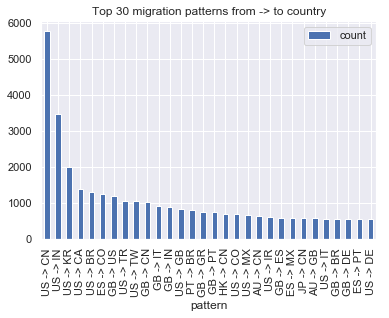

In [42]:
### Let's visualize the most and least frequent migration patterns
import seaborn as sns
sns.set()

%matplotlib inline
import matplotlib.pyplot as plt


migration_pattern_count=last_education_first_employment_diff_country.groupby(['country_edu','country_emp']).size().reset_index(name="count").sort_values(by="count",ascending=False)

migration_pattern_count['pattern']=migration_pattern_count['country_edu']+" -> "+migration_pattern_count['country_emp']
migration_pattern_count=migration_pattern_count[['pattern','count']]
most_migration_patterns_count=migration_pattern_count.head(30)
print(most_migration_patterns_count)

ax = most_migration_patterns_count.plot.bar(x='pattern', y='count', rot=90)
plt.title("Top 30 migration patterns from -> to country")
plt.show()

       pattern  count
3428  NZ -> HK      1
3463  NZ -> SA      1
3464  NZ -> SD      1
1851  GB -> GD      1
1801  FR -> UZ      1
1754  FR -> MM      1
1758  FR -> MT      1
1759  FR -> MU      1
1762  FR -> MZ      1
1770  FR -> PA      1
3494  PE -> AT      1
3492  PA -> ZA      1
3489  PA -> IN      1
1785  FR -> SD      1
3487  PA -> CR      1
1788  FR -> SI      1
3483  OM -> PK      1
3468  NZ -> TO      1
1804  FR -> YE      1
3481  OM -> IR      1
1806  FR -> ZM      1
3479  OM -> GH      1
1809  GB -> AL      1
3477  NZ -> YE      1
3475  NZ -> UY      1
1827  GB -> CD      1
3473  NZ -> UA      1
3470  NZ -> TT      1
1845  GB -> ER      1
1389  EE -> AM      1


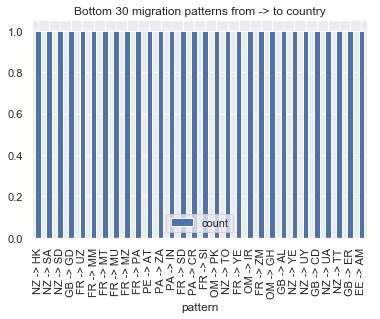

In [44]:
least_migration_patterns_count=migration_pattern_count.tail(30)
print(least_migration_patterns_count)

ax = least_migration_patterns_count.plot.bar(x='pattern', y='count', rot=90)
plt.title("Bottom 30 migration patterns from -> to country")
plt.show()

In [ ]:
# set_affiliations_per_person.filter(lambda x: len(x["affiliation_type"])>1)
# .apply(lambda df: df[ df.B == df.B.max()])
set_affiliations_per_person_more_than_one=set_affiliations_per_person[set_affiliations_per_person['affiliation_type'].len>1]